## Sample Midterm Exam Questions
### For each question you are expected to write the Python code to attain the necessary graphs or results

In [1]:
# The necesary python packages have been imported
# for data structures and manipulation

import numpy as np # for mathematical caluclations
import pandas as pd 
import datetime  # to access datetime

# for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the plot style in matplotlib to ggplot and the firgure size to 15x5## Augmented Dickey Fuller Test for Assessing Stationarity
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,5)

# for ingnoring warnings
import warnings # to ignore warning
warnings.filterwarnings('ignore')

In [2]:
# The Netflix csv file is imported and shows the stock data for Netflix where Open,High,Low, Close and Adj Close refers to
#Netflix stock price
Netflix=pd.read_csv('Netflix.csv',parse_dates=['Date'])
Netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,4.217143,4.357143,4.200000,4.267143,4.267143,6605200
1,2009-01-05,4.327143,4.562857,4.302857,4.562857,4.562857,13044500
2,2009-01-06,4.591429,4.750000,4.590000,4.705714,4.705714,12065900
3,2009-01-07,4.715714,4.734286,4.571429,4.672857,4.672857,10133900
4,2009-01-08,4.618571,4.797143,4.485714,4.735714,4.735714,8175300


In [3]:
#Extract the year, month and quarter information from the dataframe and add them as new varriables to the Netflix dataframe
Netflix['Year']=Netflix['Date'].dt.year
Netflix['Month']=Netflix['Date'].dt.month
Netflix['quarter']=Netflix['Date'].dt.quarter
Netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,quarter
0,2009-01-02,4.217143,4.357143,4.200000,4.267143,4.267143,6605200,2009,1,1
1,2009-01-05,4.327143,4.562857,4.302857,4.562857,4.562857,13044500,2009,1,1
2,2009-01-06,4.591429,4.750000,4.590000,4.705714,4.705714,12065900,2009,1,1
3,2009-01-07,4.715714,4.734286,4.571429,4.672857,4.672857,10133900,2009,1,1
4,2009-01-08,4.618571,4.797143,4.485714,4.735714,4.735714,8175300,2009,1,1


In [4]:
#Create a new variable, Price Range which takes the difference between the High and Low Price for the data and add it
#to the dataframe
Netflix['Price_Range']=Netflix['High']-Netflix['Low']
Netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,quarter,Price_Range
0,2009-01-02,4.217143,4.357143,4.200000,4.267143,4.267143,6605200,2009,1,1,0.157143
1,2009-01-05,4.327143,4.562857,4.302857,4.562857,4.562857,13044500,2009,1,1,0.260000
2,2009-01-06,4.591429,4.750000,4.590000,4.705714,4.705714,12065900,2009,1,1,0.160000
3,2009-01-07,4.715714,4.734286,4.571429,4.672857,4.672857,10133900,2009,1,1,0.162857
4,2009-01-08,4.618571,4.797143,4.485714,4.735714,4.735714,8175300,2009,1,1,0.311429


In [5]:
#Create a variable called PriceDiff which measures the difference between the opening price and the closing price
#What is the proportion of days when Netflix stock closed for a loss
Netflix['PriceDiff']=Netflix['Open']-Netflix['Close']
Netflix['PriceLoss']=['Loss' if i <0 else 'Gain' for i in Netflix['PriceDiff']]
Netflix['PriceLoss'].value_counts(normalize= True) 

PriceLoss
Gain    0.504971
Loss    0.495029
Name: proportion, dtype: float64

In [6]:
Netflix['PriceLossA']=['Loss' if i <0 in Netflix['Open'] - Netflix['Close'] else 'Gain' for i in Netflix['PriceDiff']]
Netflix['PriceLossA'].value_counts(normalize= True)

PriceLossA
Gain    0.504971
Loss    0.495029
Name: proportion, dtype: float64

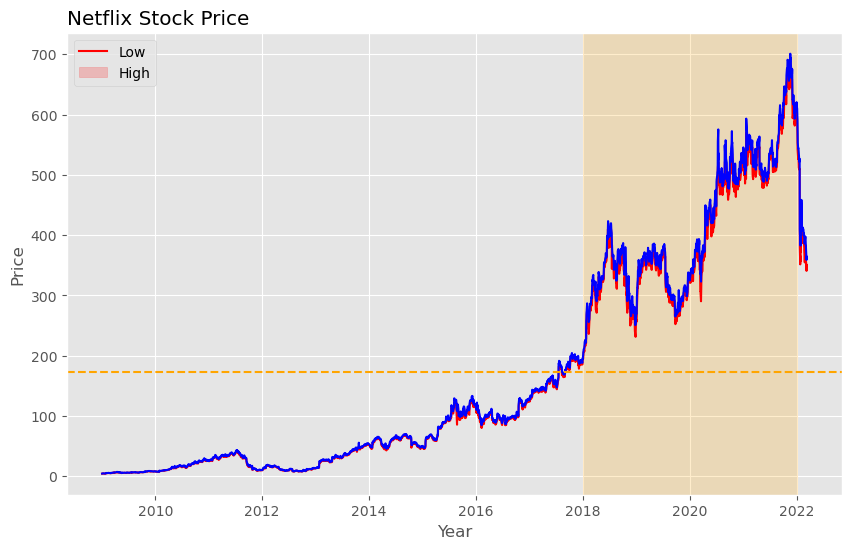

In [7]:
#Create lineplots that show Netflix's High and Low prices for the day, with linecolor red showing the low and blue the highs 
#Include the x label (year) and y label (Price)
#Include the title Netflix Stock Price and locate to the left
#Include the legends "Low" and "High"
#Include a horizontal line that shows the average (High) price of Netflix stock
#Include an orange vertical span that ranges from 2018 to 2022 with a transparency of 0.2

plt.figure(figsize = (10, 6))
sns.lineplot(data=Netflix,x='Date',y='Low',color='red')
sns.lineplot(data=Netflix,x='Date',y='High',color='blue')
plt.ylabel('Price')
plt.xlabel('Year')
plt.title("Netflix Stock Price",loc='Left')
plt.legend(labels=['Low','High'])

avg_price=Netflix['High'].mean()

plt.axvspan("2018","2022",color='orange',alpha=0.2)

plt.axhline(y=avg_price,color='orange',linestyle='--')





In [8]:
#The dataset Health shows the Health Spending and Life Expenctancy for select countries over the years
health=pd.read_csv('healthexp.csv')
health.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [9]:
#Create a dataframe yearly-Health that shows the average annual health spending for the countries over the years

In [10]:
health.groupby(['Country','Year']).Spending_USD.mean()

Country  Year
Canada   1971      313.391
         1976      543.337
         1979      692.269
         1980      791.812
         1981      898.807
                   ...    
USA      2016     9717.649
         2017    10046.472
         2018    10451.386
         2019    10855.517
         2020    11859.179
Name: Spending_USD, Length: 274, dtype: float64

In [11]:
yearly_health=health.groupby(['Country','Year']).Spending_USD.mean().unstack()
yearly_health

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Canada,NaN,313.391,NaN,NaN,NaN,NaN,543.337,NaN,NaN,692.269,...,4228.962,4336.249,4428.753,4536.810,4635.285,5044.275,5150.470,5308.356,5189.721,5828.324
France,192.143,NaN,NaN,NaN,NaN,363.610,NaN,NaN,NaN,NaN,...,4161.698,4299.434,4544.964,4626.679,4667.156,4928.128,5005.756,5099.306,5167.839,5468.418
Germany,252.311,298.251,337.364,384.541,452.744,532.481,591.098,647.352,729.457,800.703,...,4566.678,4745.546,4951.677,5151.709,5295.975,5669.064,5970.163,6281.840,6407.928,6938.983
Great Britain,123.993,134.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3495.652,3614.131,3667.636,3758.935,3805.820,3960.141,4059.125,4189.708,4385.463,5018.700
Japan,150.437,163.854,185.390,205.778,242.018,284.269,303.725,340.628,392.577,452.931,...,3740.756,3970.765,4308.252,4328.364,4515.556,4295.858,4412.852,4554.276,4610.794,4665.641
USA,326.961,357.988,397.097,439.302,495.114,560.750,638.851,726.241,808.884,908.963,...,8079.467,8346.064,8519.620,8925.879,9355.118,9717.649,10046.472,10451.386,10855.517,11859.179


In [12]:
#Extract the health spending, Life expectancy and year for the U.S.
health.loc[(health['Country']=='USA')].head()

,Year,Country,Spending_USD,Life_Expectancy
4,1970,USA,326.961,70.9
9,1971,USA,357.988,71.2
12,1972,USA,397.097,71.2
15,1973,USA,439.302,71.4
18,1974,USA,495.114,72.0


In [13]:
#Show the average health spending for each country over the years.
yearly_health2=health.groupby(['Country'])['Spending_USD'].mean()
yearly_health2

Country
Canada           2685.778341
France           3045.145057
Germany          2667.280200
Great Britain    2034.192465
Japan            1860.257902
USA              4388.570529
Name: Spending_USD, dtype: float64

In [14]:
#Show the average life expectancy for each country over the years.
yearly_health3=health.groupby(['Country'])['Life_Expectancy'].mean()
yearly_health3

Country
Canada           78.706818
France           79.565714
Germany          76.726000
Great Britain    77.620930
Japan            79.554902
USA              75.843137
Name: Life_Expectancy, dtype: float64

In [15]:
#List the Health spending for the countries for 2020 from highest to lowest
health.loc[health['Year']==2020,].sort_values(by='Spending_USD',ascending=False).reset_index()

,index,Year,Country,Spending_USD,Life_Expectancy
0,273,2020,USA,11859.179,77.0
1,269,2020,Germany,6938.983,81.1
2,268,2020,Canada,5828.324,81.7
3,270,2020,France,5468.418,82.3
4,271,2020,Great Britain,5018.700,80.4
5,272,2020,Japan,4665.641,84.7


In [16]:
#What is the total health spending for France in 2015?
health.loc[(health['Country']=='France') & (health['Year']==2015),'Spending_USD'].sum()

4667.156

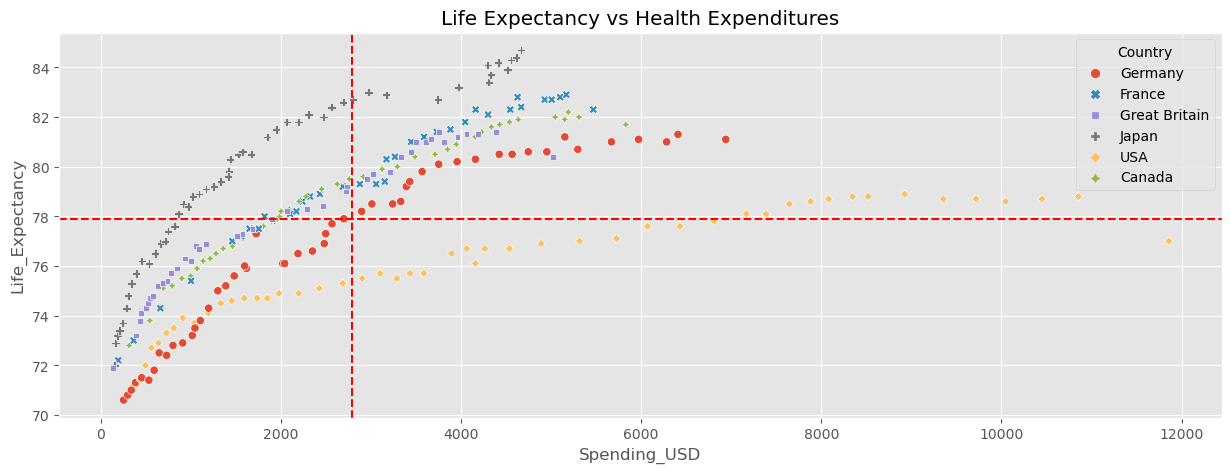

In [17]:
#Create a scatterplot that shows Health Spending on the x-axis and life-expectancy on the y-axis for all countries
#Distinguish each country by a different color and marker
#add horizontal and vertical lines to your graph to correspond to the mean life expectancy(horizontal) and
#mean spending (vertical) selecting red as the line color and 'dashed' as the linesyle
#add the title "Life Expectancy ve Health Expenditures"

sns.scatterplot(health,x='Spending_USD',y='Life_Expectancy',style='Country',hue='Country')
plt.title("Life Expectancy vs Health Expenditures")
avg_exp=health['Spending_USD'].mean()
avg_lfexp=health['Life_Expectancy'].mean()
plt.axvline(x=avg_exp,color='red',linestyle='--')
plt.axhline(y=avg_lfexp,color='red',linestyle='--')

In [18]:
#Which country seems to have the largest health expenditure but relatively low life-expctancies? 
#Which country seeems to have the lowest health expenditures but relatively higher life-expectancies?

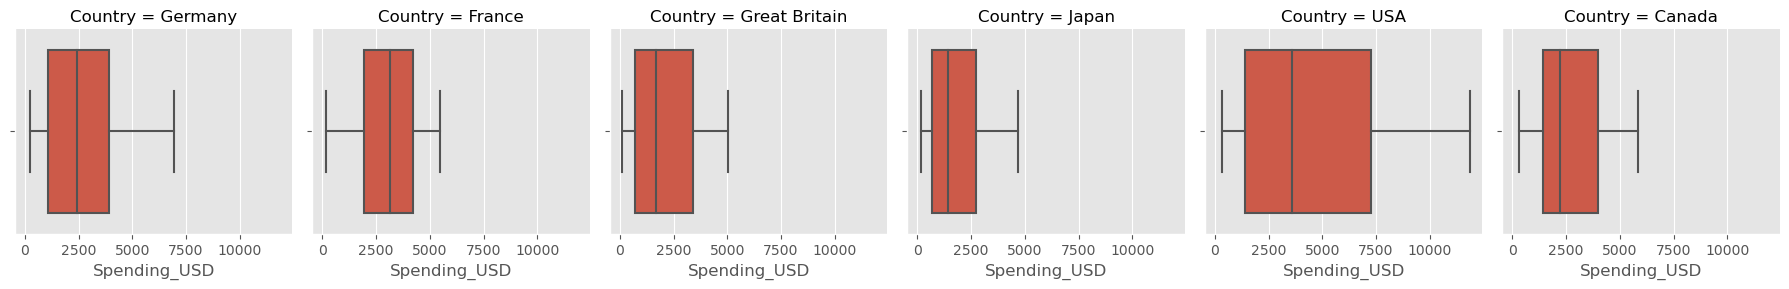

In [19]:
#Create box-plots to compare the relative health expenditures of the 6 countries
g=sns.FacetGrid(health,col='Country')
g.map(sns.boxplot,'Spending_USD',order=['Canada','France','Germany','Great Britain','Japan','USA'])


In [20]:
#Comment on the boxplots you created in terms of the summary measures



In [21]:
#It was been argued that health expenditures have increased significantly in the last 20 years.
#Create 3 periods corresponding to the following:
#Period 1 from 1970 to before 1990
#Period 2 from 1970 to before 2010
#Period 3 from 2010 onwards
#Create box plots to correspond to these periods to compare the health expenditures. Does the data support this argument?

In [22]:
def decade(year):
    if 1990 > year >=1970:
        return "Period1"
    elif 2010 > year >=1990:
        return "Period2"
    else:
        return "Period3"

In [23]:
def decade(year):
    if 1970 <= year <1990:
        return "Period1"
    elif 1990 <= year <2010:
        return "Period2"
    else:
        return "Period3"
    

In [24]:
health['Decade']=[decade(year) for year in health['Year']]
health.head(200)

,Year,Country,Spending_USD,Life_Expectancy,Decade
0,1970,Germany,252.311,70.6,Period1
1,1970,France,192.143,72.2,Period1
2,1970,Great Britain,123.993,71.9,Period1
3,1970,Japan,150.437,72.0,Period1
4,1970,USA,326.961,70.9,Period1
...,...,...,...,...,...
195,2007,USA,7166.513,78.1,Period2
196,2008,Canada,3849.544,80.7,Period2
197,2008,Germany,3955.136,80.2,Period2
198,2008,France,3729.353,81.4,Period2


In [25]:
health["PeriodA"] = pd.Series(['Period1' if (1970 <= year < 1990) else 'Period2' if (1990 <= year < 2010) else 'Period3' for year in health['Year']])
health.head()

,Year,Country,Spending_USD,Life_Expectancy,Decade,PeriodA
0,1970,Germany,252.311,70.6,Period1,Period1
1,1970,France,192.143,72.2,Period1,Period1
2,1970,Great Britain,123.993,71.9,Period1,Period1
3,1970,Japan,150.437,72.0,Period1,Period1
4,1970,USA,326.961,70.9,Period1,Period1


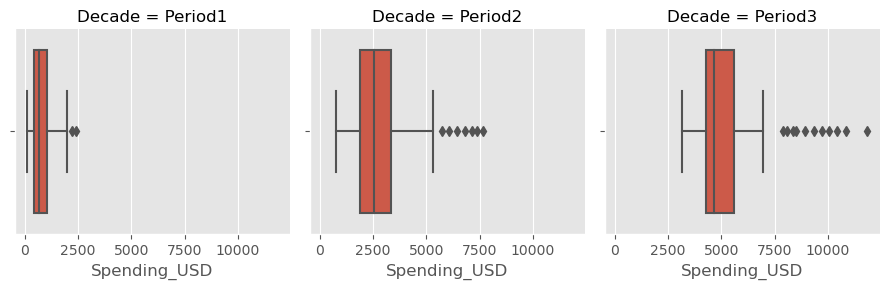

In [26]:
g=sns.FacetGrid(health,col='Decade')
g.map(sns.boxplot,'Spending_USD',order=['Period1','Period2','Period3'])


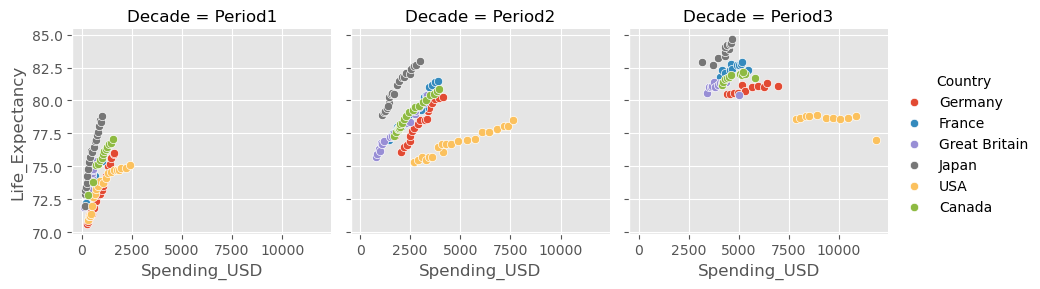

In [27]:
#Create 3 scatterplots to contrast the spending on heath care and Life expectancy for the 6 countries foe the different periods.
#Add a legend to the plots
#Differentiate Country by Colors

g=sns.FacetGrid(health,col='Decade',hue='Country')
g.map(sns.scatterplot,'Spending_USD','Life_Expectancy')
g.add_legend()

<Axes: >

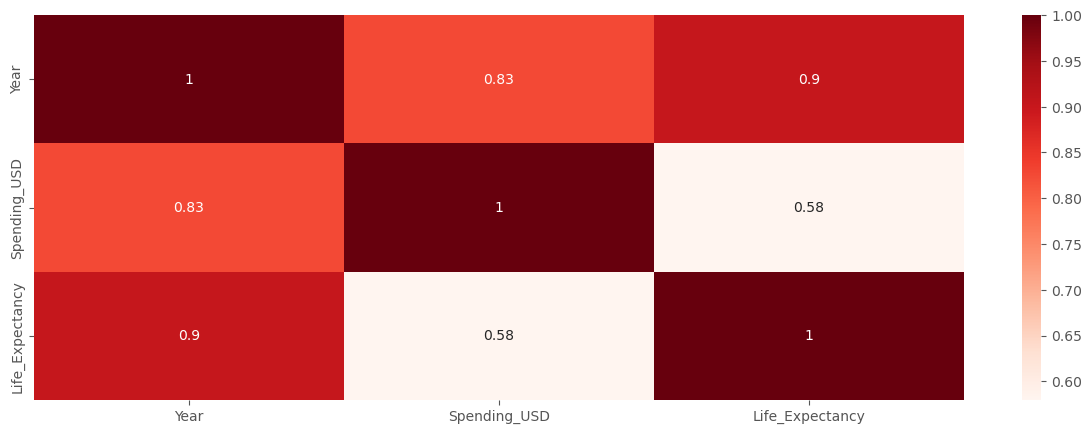

In [28]:
#Create a heat-map to show the correlations between spending, life expectancy and years
cor_heath=health.corr(numeric_only=True)
sns.heatmap(cor_heath,annot=True,cmap="Reds")